In [1]:
# Step 1: Import necessary libraries and load the dataset


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix



In [2]:
# Load the dataset
df = pd.read_csv('zoo.csv')

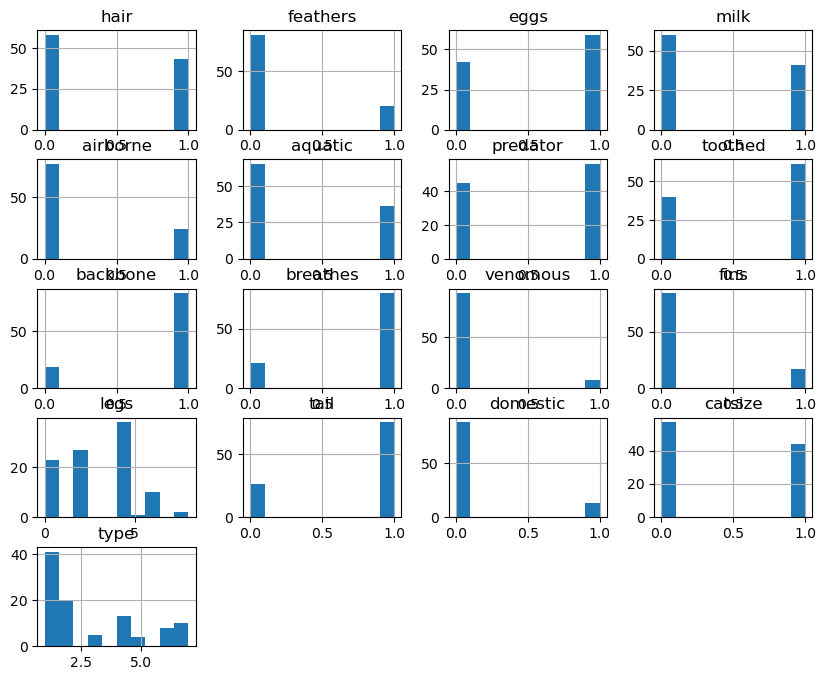

ValueError: could not convert string to float: 'aardvark'

In [4]:
# Step 2: Analyze the data using visualizations


# Plot histograms for each feature
df.hist(figsize=(10, 8))
plt.show()

# Plot scatter plots for each pair of features

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop('type', axis=1))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['type'])
plt.show()






animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


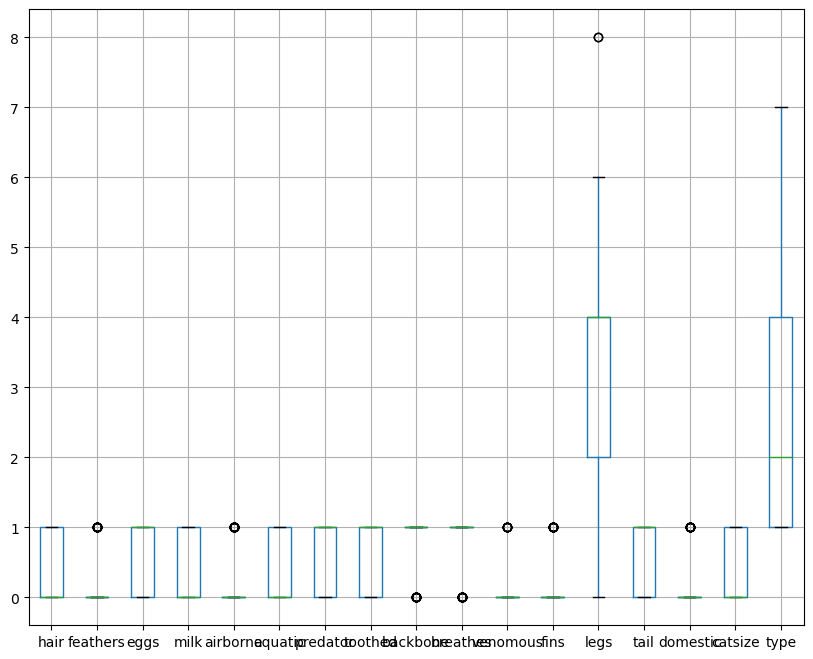

In [9]:
# Step 3: Preprocess the data by handling missing values & Outliers


# Check for missing values
print(df.isnull().sum())

# Handle missing values using imputation
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']] = imputer.fit_transform(df[['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']])



# Check for outliers using boxplots
df.boxplot(figsize=(10, 8))
plt.show()

# Handle outliers using winsorization
from scipy.stats import mstats

# Select the columns you want to winsorize
columns_to_winsorize = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']

# Apply winsorize to each column
for column in columns_to_winsorize:
    df[column] = mstats.winsorize(df[column], limits=[0.1, 0.1])

In [13]:

# Step 4: Split the dataset into training and testing sets
X = df.drop('type', axis=1)
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (80, 17)
X_test shape: (21, 17)
y_train shape: (80,)
y_test shape: (21,)


In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode the categorical values in the 'type' column
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)



In [27]:
import pandas as pd

# Load the dataset
df = pd.read_csv('zoo.csv')

# Get the column names
column_names = df.columns

# Print the column names
print(column_names)


Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


In [28]:
import pandas as pd

# Load the dataset
df = pd.read_csv('zoo.csv')

# Preview the first few rows
print(df.head())


  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv('zoo.csv')

# Encode the categorical values in the 'animal name' column
le = LabelEncoder()
df['animal name'] = le.fit_transform(df['animal name'])

# Encode the categorical values in the 'type' column
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Split the dataset into training and testing sets
X = df.drop('type', axis=1)
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement the K-Nearest Neighbours algorithm
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Print the accuracy of the classifier
print("Accuracy:", knn.score(X_test, y_test))

# Print the predicted values
print("Predicted values:", y_pred)





Accuracy: 0.42857142857142855
Predicted values: [1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0]


In [43]:
# Step 6: Evaluate the classifier's performance


# Print the accuracy of the classifier
print("Accuracy:", knn.score(X_test, y_test))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the precision, recall, and F1-score
print("Precision:", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='macro', zero_division=0))
print("F1-score:", f1_score(y_test, y_pred, average='macro', zero_division=0))



Accuracy: 0.42857142857142855
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        12
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.43        21
   macro avg       0.09      0.12      0.11        21
weighted avg       0.32      0.43      0.37        21

Confusion Matrix:
[[9 3 0 0 0 0]
 [2 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 2 0 0 0 0]
 [3 0 0 0 0 0]
 [1 0 0 0 0 0]]
Precision: 0.09375
Recall: 0.125
F1-score: 0.10714285714285715


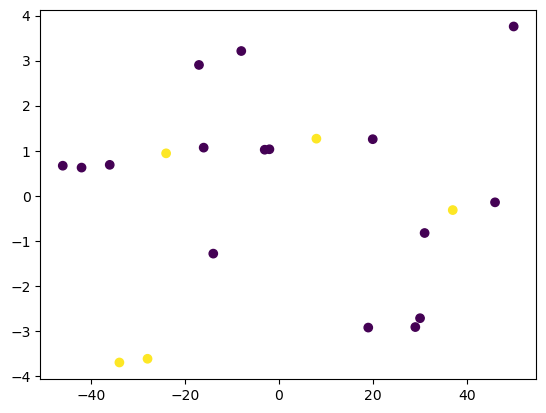

In [42]:
# step 7: Visualize the decision boundaries of the classifier


# Visualize the decision boundaries of the classifier
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [ ]:
# Inteview questions
1. What are the key hyperparameters in KNN?

The key hyperparameters in K-Nearest Neighbors (KNN) are:

- k: The number of nearest neighbors to consider when making a prediction. A small value of k can lead to overfitting, while a large value can lead to underfitting.
- weights: The weights assigned to the nearest neighbors. Common options include 'uniform' (equal weights) and 'distance' (weights inversely proportional to distance).
- algorithm: The algorithm used to compute the nearest neighbors. Options include 'auto', 'ball_tree', 'kd_tree', and 'brute'.
- leaf_size: The leaf size of the ball tree or KD tree. This can affect the speed of the algorithm.
- p: The power parameter for the Minkowski distance metric. A value of 2 corresponds to the Euclidean distance, while a value of 1 corresponds to the Manhattan distance.

2. What distance metrics can be used in KNN?

KNN can use various distance metrics to measure the similarity between data points. Some common distance metrics used in KNN include:

- Euclidean distance (L2 distance): The straight-line distance between two points.
- Manhattan distance (L1 distance): The sum of the absolute differences in the coordinates.
- Minkowski distance: A generalization of the Euclidean and Manhattan distances, with the power parameter p controlling the distance metric.
- Cosine distance: A measure of the angle between two vectors, often used in text classification and clustering.
- Hamming distance: The number of positions at which two strings differ, often used in categorical data.

These distance metrics can be used depending on the nature of the data and the specific problem being addressed.